# XTX Market Challenge

Here, we will try prediction methods to see how best we can predict the market stock price as given in this challenge.   
Check out challenge.xtxmarkets.com for more information about this challenge

### Import packages

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Read and view our file

The data contains about 3 million rows and is stored in csv which is about 1GB. I had to convert this to hdf format to reduce the size of the data and quicken computation.  
We would read the data from the hdf format.

In [2]:
# save to data frame
df = pd.read_hdf('new.h5')

In [3]:
df.head()

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


In [4]:
df.tail()

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
2999994,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999995,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999996,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999997,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999998,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5


### Basic wrangling

In [5]:
# check for data types
df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [6]:
# view columns with null values
null = df.isnull().sum()
null[null>0]

askRate1      36
askRate2      64
askRate3      97
askRate4     138
askRate5     173
askRate6     207
askRate7     238
askRate8     265
askRate9     291
askRate10    325
askRate11    360
askRate12    394
askRate13    429
askRate14    451
askSize1      36
askSize2      64
askSize3      97
askSize4     138
askSize5     173
askSize6     207
askSize7     238
askSize8     265
askSize9     291
askSize10    325
askSize11    360
askSize12    394
askSize13    429
askSize14    451
dtype: int64

In [3]:
# fill null values with 0 as required from the competition
df.fillna(0, inplace = True)

In [8]:
# verify if null values were filled 
df.isnull().values.any()

False

### Data exploration

In [9]:
df.describe()

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
count,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06,...,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06,2.999999e+06
mean,1.642373e+03,1.642860e+03,1.643348e+03,1.643833e+03,1.644313e+03,1.644795e+03,1.645280e+03,1.645768e+03,1.646261e+03,1.646762e+03,...,1.658825e+01,1.583800e+01,1.603431e+01,1.589281e+01,1.657957e+01,1.678613e+01,1.809773e+01,1.858412e+01,1.949315e+01,-7.023336e-04
std,2.687644e+01,2.747233e+01,2.792671e+01,2.845367e+01,2.909564e+01,2.963349e+01,3.014723e+01,3.060886e+01,3.100550e+01,3.138272e+01,...,2.610603e+01,2.645040e+01,2.745232e+01,2.800111e+01,3.055616e+01,3.161555e+01,3.379460e+01,3.526231e+01,3.590462e+01,7.085593e-01
min,1.575500e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.000000e+00
25%,1.622500e+03,1.623000e+03,1.623500e+03,1.624000e+03,1.624500e+03,1.625000e+03,1.625500e+03,1.626000e+03,1.626500e+03,1.627000e+03,...,6.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,-5.000000e-01
50%,1.643500e+03,1.644000e+03,1.644500e+03,1.645000e+03,1.645500e+03,1.646000e+03,1.646500e+03,1.647000e+03,1.647500e+03,1.648000e+03,...,9.000000e+00,8.000000e+00,8.000000e+00,7.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,0.000000e+00
75%,1.660500e+03,1.661000e+03,1.661500e+03,1.662000e+03,1.662500e+03,1.663000e+03,1.663500e+03,1.664000e+03,1.664500e+03,1.665000e+03,...,1.600000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.600000e+01,1.700000e+01,2.000000e+01,2.100000e+01,2.200000e+01,5.000000e-01
max,1.709000e+03,1.709500e+03,1.710000e+03,1.710500e+03,1.711000e+03,1.711500e+03,1.712000e+03,1.712500e+03,1.713000e+03,1.713500e+03,...,5.390000e+02,5.480000e+02,5.460000e+02,5.450000e+02,5.370000e+02,6.020000e+02,5.330000e+02,4.830000e+02,4.830000e+02,5.000000e+00


In [10]:
# df.corr()

### Data preparation

In [4]:
# store independent and dependent variables to dataframes
X = df.drop('y', axis=1)
Y = df['y']

In [5]:
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 

In [13]:
X_train[:5]

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14
1028186,1696.5,1697.0,1697.5,1698.0,1698.5,1699.0,1699.5,1700.0,1700.5,1701.0,...,6.0,5.0,8.0,2.0,10.0,7.0,9.0,30.0,11.0,9.0
1677599,1629.0,1629.5,1630.0,1630.5,1631.0,1631.5,1632.0,1632.5,1633.0,1633.5,...,10.0,7.0,8.0,4.0,11.0,1.0,13.0,2.0,2.0,1.0
2591234,1645.0,1645.5,1646.0,1646.5,1647.0,1647.5,1648.0,1648.5,1649.0,1649.5,...,33.0,11.0,50.0,67.0,106.0,4.0,27.0,2.0,28.0,3.0
2531724,1669.5,1670.0,1670.5,1671.0,1671.5,1672.0,1672.5,1673.0,1673.5,1674.0,...,8.0,19.0,10.0,9.0,6.0,2.0,3.0,2.0,26.0,29.0
2273790,1696.5,1697.0,1697.5,1698.0,1698.5,1699.0,1699.5,1700.0,1700.5,1701.0,...,5.0,4.0,12.0,4.0,30.0,2.0,100.0,7.0,48.0,25.0


In [14]:
y_train[:5]

1028186   -0.50
1677599    1.75
2591234   -0.50
2531724    0.00
2273790    0.75
Name: y, dtype: float64

In [15]:
X_train.count()

askRate0     2099999
askRate1     2099999
askRate2     2099999
askRate3     2099999
askRate4     2099999
askRate5     2099999
askRate6     2099999
askRate7     2099999
askRate8     2099999
askRate9     2099999
askRate10    2099999
askRate11    2099999
askRate12    2099999
askRate13    2099999
askRate14    2099999
askSize0     2099999
askSize1     2099999
askSize2     2099999
askSize3     2099999
askSize4     2099999
askSize5     2099999
askSize6     2099999
askSize7     2099999
askSize8     2099999
askSize9     2099999
askSize10    2099999
askSize11    2099999
askSize12    2099999
askSize13    2099999
askSize14    2099999
bidRate0     2099999
bidRate1     2099999
bidRate2     2099999
bidRate3     2099999
bidRate4     2099999
bidRate5     2099999
bidRate6     2099999
bidRate7     2099999
bidRate8     2099999
bidRate9     2099999
bidRate10    2099999
bidRate11    2099999
bidRate12    2099999
bidRate13    2099999
bidRate14    2099999
bidSize0     2099999
bidSize1     2099999
bidSize2     

## Creating the model

### Linear Regression

In [16]:
# initialise model
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
yhat = lr.predict(X_test)

### Evaluating model

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
mean_squared_error(y_test, yhat)

0.4970624897361555

### Visualizations

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

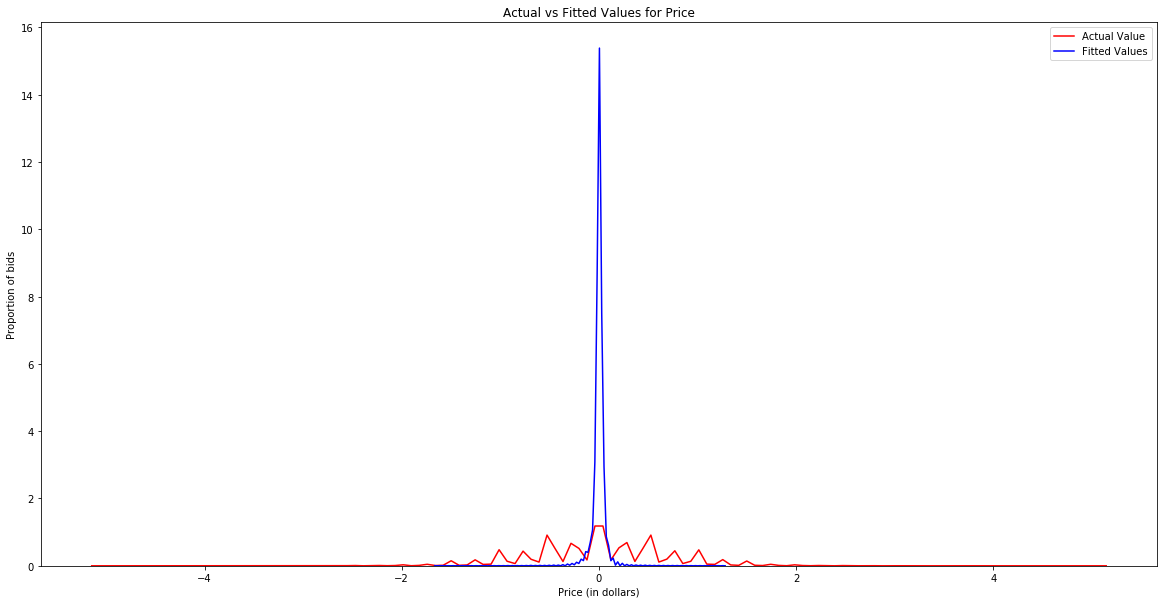

In [22]:
plt.figure(figsize=(20, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of bids')

plt.show()

In [ ]:
r2_score(y_test, yhat)

### Gradient Boosting

In [23]:
from sklearn import ensemble

In [24]:
# params = {'n_estimators': 10, 'max_depth': 2, 'min_samples_split': 2,
          #'learning_rate': 0.01, 'n_jobs':-1}

clf = ensemble.GradientBoostingRegressor(n_estimators=50, max_depth=2)

In [25]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [26]:
yhat2 = clf.predict(X_test)

In [27]:
mean_squared_error(y_test, yhat2)


0.49147648041931763

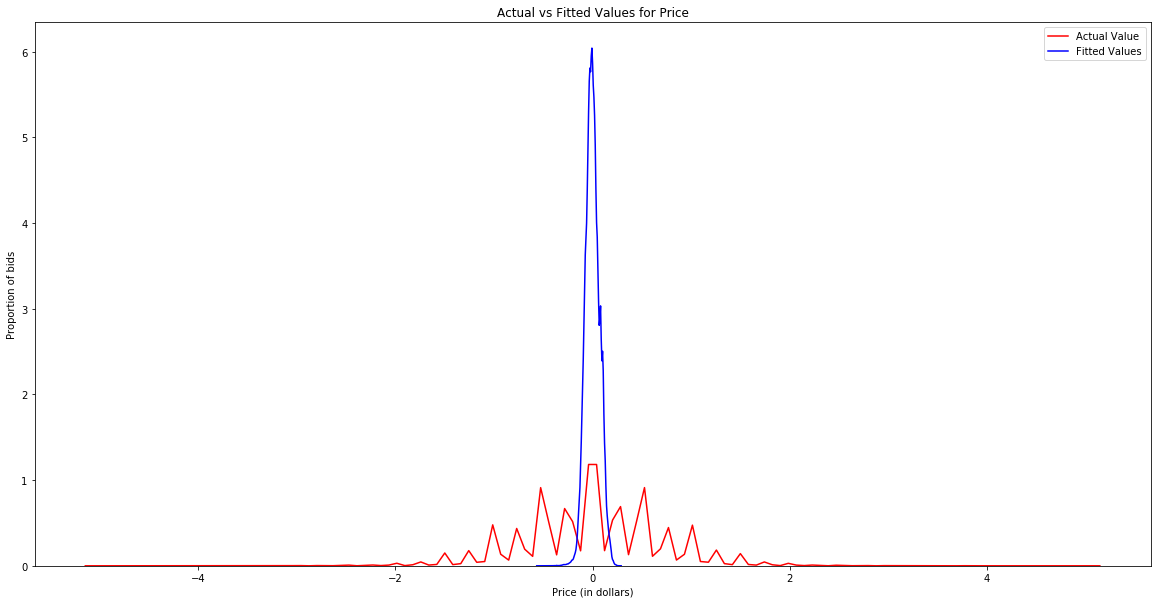

In [28]:
plt.figure(figsize=(20, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of bids')

plt.show()

In [ ]:
r2_score(y_test, yhat2)

### Random Forest Regressor

In [8]:
 from sklearn.ensemble import RandomForestRegressor

In [9]:
regr = RandomForestRegressor(n_estimators=5, n_jobs=4)

In [10]:
regr.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
yhat3 = regr.predict(X_test)

In [12]:
mean_squared_error(y_test, yhat3)

0.07246297934117318

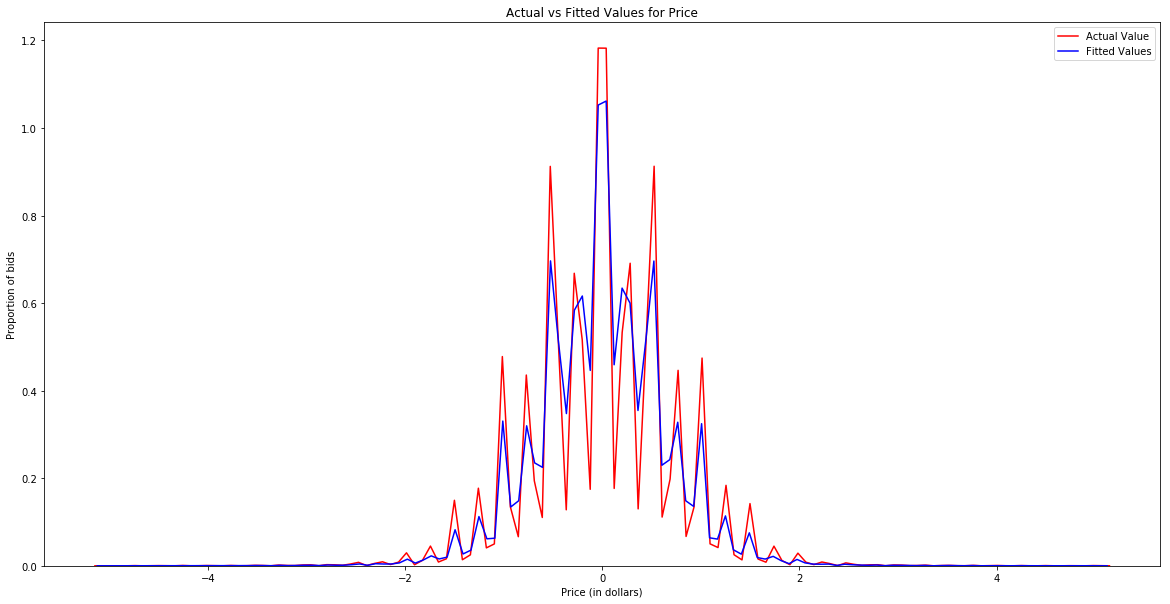

In [13]:
plt.figure(figsize=(20, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of bids')

plt.show()

In [14]:
r2_score(y_test, yhat3)

0.8552004279401384

### Testing with data.csv (out of sample testing)

In [22]:
df2=pd.read_csv('data.csv')

In [27]:
df2.fillna(0, inplace = True)

In [28]:
df2.head()

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


In [29]:
test2_x=df2.drop('y', axis = 1)

In [30]:
test2_y=df2['y']

In [31]:
yhat_test2 = regr.predict(test2_x)

In [32]:
r2_score(test2_y, yhat_test2)

0.53713876146789

In [33]:
mean_squared_error(test2_y, yhat_test2)

0.12740372474747474

### XGBOOST

In [34]:
!pip install xgboost

    100% |################################| 686kB 16.1MB/s 
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost
You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [35]:
import numpy as np
from xgboost import XGBRegressor #The library to be imported

model = XGBRegressor()

In [44]:
model.fit(X_train, y_train, verbose=False)


/opt/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:12:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [45]:
yhat4 = model.predict(X_test)

In [46]:
mean_squared_error(y_test, yhat4)

0.48513466577639

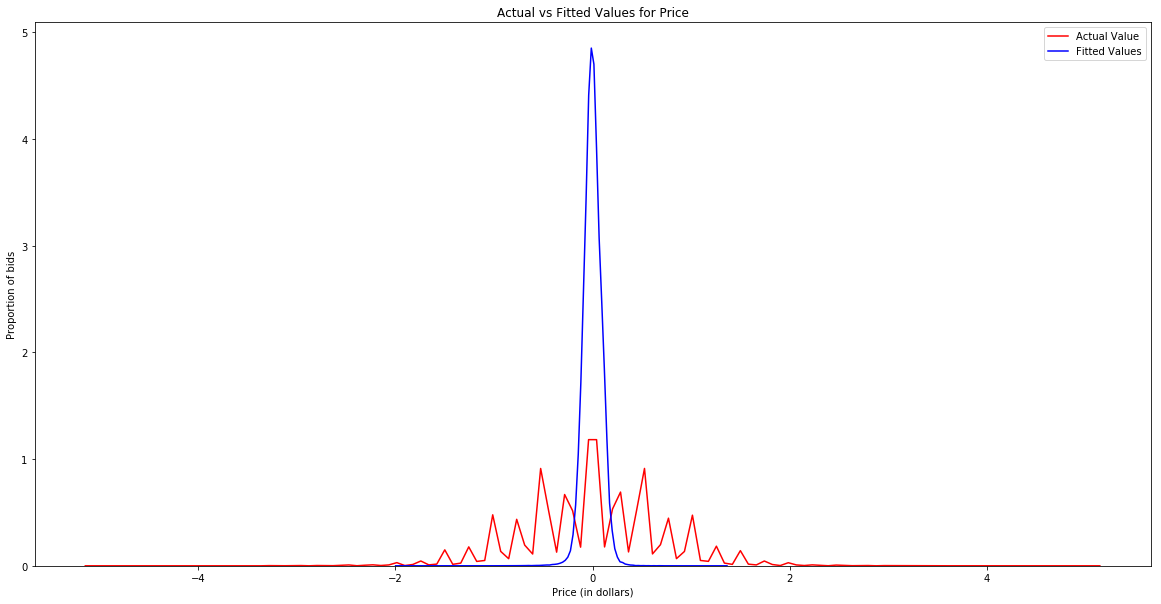

In [47]:
plt.figure(figsize=(20, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat4, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of bids')

plt.show()

In [ ]:
r2_score(y_test, yhat4)

### xgboost 2

In [36]:
import xgboost as xgb
xgdmat=xgb.DMatrix(X_train,y_train)

our_params={'objective':'reg:linear'}

/opt/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [37]:
final_gb=xgb.train(our_params,xgdmat)


[11:36:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
tesdmat=xgb.DMatrix(X_test)

In [12]:
yhat5=final_gb.predict(tesdmat)

In [13]:
mean_squared_error(y_test, yhat5)

0.4785628215799275

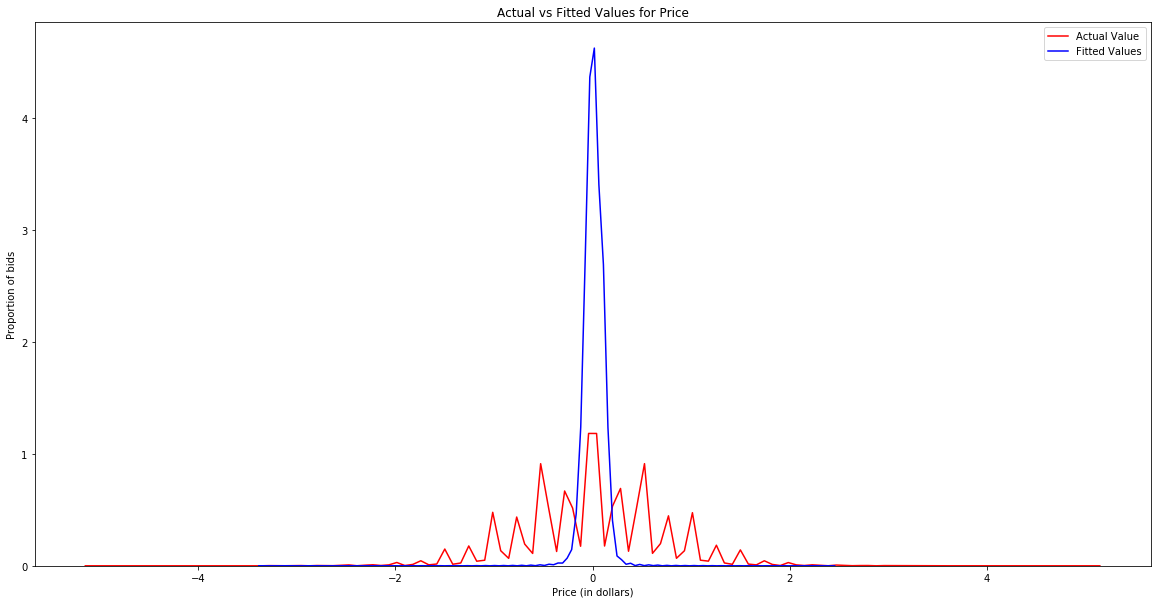

In [58]:
plt.figure(figsize=(20, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat5, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of bids')

plt.show()

In [14]:
r2_score(y_test, yhat5)

0.04370904427938882

### Testing with data.csv

In [39]:
tesdmat2=xgb.DMatrix(test2_x)

In [40]:
yhatt=final_gb.predict(tesdmat2)

In [41]:
mean_squared_error(test2_y, yhatt)

0.2144012532392807

In [42]:
r2_score(test2_y, yhatt)

0.22107434602976928